In [167]:
import pandas as pd
import json
from pandas import json_normalize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import warnings
warnings.filterwarnings("ignore")

# https://www.kaggle.com/code/aadeshpradhan/data-cleaning-viz-for-beginners-intermediate
# https://www.kaggle.com/code/faiqueali/data-alchemy-unveiling-insights-through-transform

In [168]:
df = pd.read_csv("movies.csv")

In [169]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [170]:
# some cleaning up
# df_without_rating_nulls = df.drop_nulls("RATING")
df.drop_duplicates(subset=['MOVIES', "YEAR", "GENRE"], inplace=True)

In [171]:
df["YEAR"] = df["YEAR"].str.replace('[^0-9]','')
# df['YEAR2'] = [int(str(i)[:4]) if str(i).isdigit() else None for i in df.YEAR]
df["ONE-LINE"] = df["ONE-LINE"].str.replace('[^a-zA-Z0-9 ]','')
df["GENRE"]=df["GENRE"].str.strip("\n")

df["YEAR"]=df["YEAR"].apply(lambda x : str(x))
df["YEAR"]=df["YEAR"].apply(lambda x : (x[0:4] + ", " + x[4:8]) if len(x)>4 else x)
df


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,A prequel set before the events of Army of the...,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9935,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,Add a Plot,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9964,AlRawabi School for Girls,2021,Drama,NaN,Add a Plot,\n Director:\nTima Shomali\n| \n Stars:\...,NaN,NaN,NaN
9993,Totenfrau,2022,"Drama, Thriller",NaN,Add a Plot,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",NaN,Add a Plot,\n,NaN,NaN,NaN


In [172]:
df.loc[9995:].transpose()

,9995,9996
MOVIES,Arcane,Heart of Invictus
YEAR,2021,2022
GENRE,"Animation, Action, Adventure","Documentary, Sport"
RATING,NaN,NaN
ONE-LINE,Add a Plot,Add a Plot
STARS,\n,\n Director:\nOrlando von Einsiedel\n| \n ...
VOTES,NaN,NaN
RunTime,NaN,NaN
Gross,NaN,NaN


In [173]:
extr = [str(i).replace("(", "").replace(")", "").replace(" ", "").replace("I", "").replace("V", "")[:4] for i in df.YEAR]
# extr = df['YEAR'].str.extract(r'\((\d{4}\*)', expand=False)
# [i if not int(i) else None for i in extr]
df['YEAR2'] = [int(i) if i.isdigit() else None for i in extr]
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,YEAR2
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021.0
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013.0
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,A prequel set before the events of Army of the...,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021.0
...,...,...,...,...,...,...,...,...,...,...
9935,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,Add a Plot,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN,2021.0
9964,AlRawabi School for Girls,2021,Drama,NaN,Add a Plot,\n Director:\nTima Shomali\n| \n Stars:\...,NaN,NaN,NaN,2021.0
9993,Totenfrau,2022,"Drama, Thriller",NaN,Add a Plot,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN,2022.0
9995,Arcane,2021,"Animation, Action, Adventure",NaN,Add a Plot,\n,NaN,NaN,NaN,2021.0


In [175]:
df['STARS'] = df['STARS'].str.replace("\n", "")
df.STARS

0           Director:Peter Thorwarth|     Stars:Peri B...
1                       Stars:Chris Wood, Sarah Michel...
2                       Stars:Andrew Lincoln, Norman R...
3                       Stars:Justin Roiland, Chris Pa...
4           Director:Matthias Schweighöfer|     Stars:...
                              ...                        
9935                    Stars:Morgan Taylor Campbell, ...
9964        Director:Tima Shomali|     Stars:Salsabiel...
9993        Director:Nicolai Rohde|     Stars:Felix Kl...
9995                                                     
9996        Director:Orlando von Einsiedel|     Star:P...
Name: STARS, Length: 6884, dtype: object

In [176]:
split = df['STARS'].str.split('Stars:', 1, expand=True)
df_split = df.assign(DIRECTOR=split[0], STARS=split[1])
df_split.DIRECTOR = [i.replace("|", "").replace("Director:", "") for i in df_split['DIRECTOR'].str.strip()]
# df_split.drop('name', 1, inplace=True)
df_split

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,YEAR2,DIRECTOR
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...","21,062",121.0,NaN,2021.0,Peter Thorwarth
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...","17,870",25.0,NaN,2021.0,
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...","885,805",44.0,NaN,2010.0,
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...","414,849",23.0,NaN,2013.0,
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,A prequel set before the events of Army of the...,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",NaN,NaN,NaN,2021.0,Matthias Schweighöfer
...,...,...,...,...,...,...,...,...,...,...,...
9935,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,Add a Plot,"Morgan Taylor Campbell, Chris Cope, Iñaki Godo...",NaN,NaN,NaN,2021.0,
9964,AlRawabi School for Girls,2021,Drama,NaN,Add a Plot,"Salsabiela A., Joanna Arida, Yara Mustafa, Rak...",NaN,NaN,NaN,2021.0,Tima Shomali
9993,Totenfrau,2022,"Drama, Thriller",NaN,Add a Plot,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",NaN,NaN,NaN,2022.0,Nicolai Rohde
9995,Arcane,2021,"Animation, Action, Adventure",NaN,Add a Plot,None,NaN,NaN,NaN,2021.0,


In [166]:
# some analysis
df_without_rating_nulls = df.dropna(subset = 'RATING')
worst_rated_titles = df_without_rating_nulls.sort_values(by="RATING").head(1)[["MOVIES", "RATING"]]
print(worst_rated_titles)

min_rating = min(df_without_rating_nulls.RATING)
worst_rated_alternatives = df_without_rating_nulls[df_without_rating_nulls.RATING == min_rating][["MOVIES","GENRE"]]
print(worst_rated_alternatives)

               MOVIES  RATING
1166  Raketsonyeondan     1.1
               MOVIES                             GENRE
1166  Raketsonyeondan  Comedy, Drama, Sport            


In [128]:
min(df_without_rating_nulls.RATING)

1.1

In [134]:
# filling in missing names (if we have another column to map to)
# thm = themes[themes.name != ""].drop_duplicates()
# themes2 = pd.merge(themes['columntomapwith'], thm, on='columntomapwith', how='left')
# themes2
df_without_rating_nulls.describe()

,RATING,RunTime,YEAR2
count,5855.000000,5189.000000,5854.000000
mean,6.631990,79.332049,2015.256577
std,1.211765,49.805510,8.308923
min,1.100000,1.000000,1932.000000
25%,5.900000,46.000000,2014.000000
50%,6.800000,83.000000,2017.000000
75%,7.500000,100.000000,2019.000000
max,9.400000,853.000000,2021.000000


In [177]:
df.isnull().sum()

MOVIES         0
YEAR           0
GENRE         78
RATING      1029
ONE-LINE       0
STARS          0
VOTES       1029
RunTime     1540
Gross       6424
YEAR2        565
dtype: int64

(0.685, 9.815000000000001)


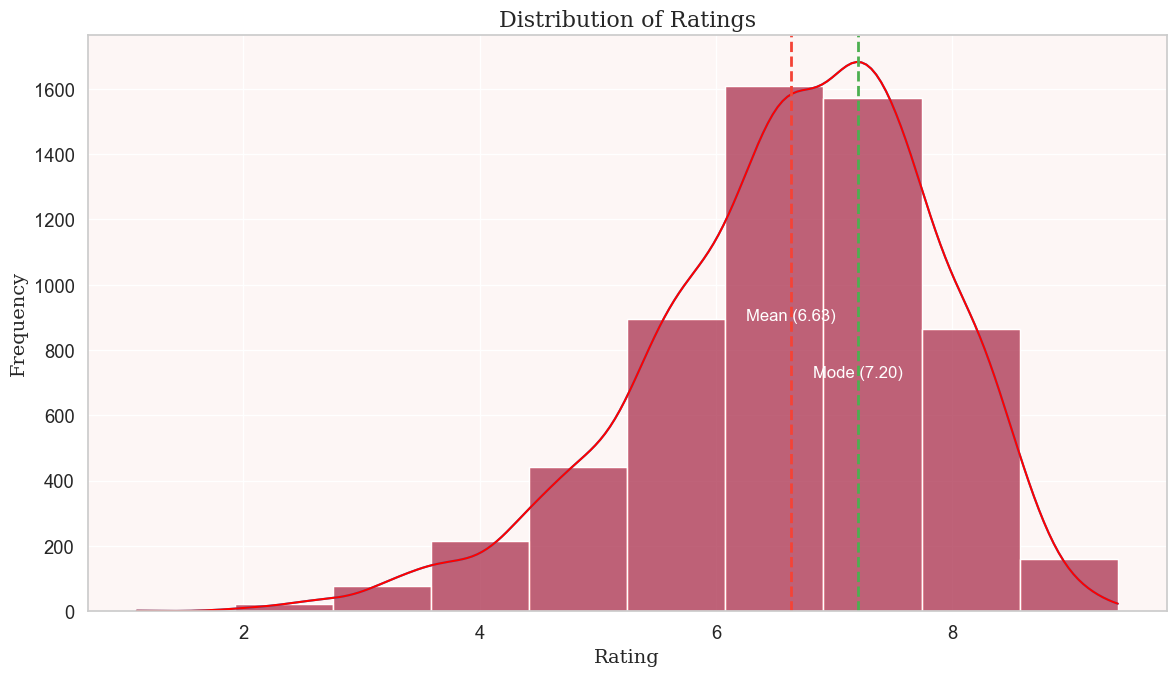

In [135]:
movies = df_without_rating_nulls.copy()

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2, rc={"grid.color": "#fff", "axes.facecolor": "#fbe9e760"})

# Plotting the histogram-style bar plot for ratings
plt.figure(figsize=(12, 7))
sns.histplot(data=movies, x='RATING', bins=10, kde=True, color='#0091ea')
# Change font family for titles
plt.title('Distribution of Ratings', fontsize=16, fontfamily='serif')
plt.xlabel('Rating', fontsize=14,  fontfamily='serif')
plt.ylabel('Frequency', fontsize=14,  fontfamily='serif')
plt.tight_layout()  # Adjust layout for better spacing

ax = sns.histplot(data=movies, x='RATING', bins=10, kde=True, color='red')

# Calculate mean and mode
mean_rating = movies['RATING'].mean()
mode_rating = movies['RATING'].mode().iloc[0]

# Add vertical lines for mean and mode
ax.axvline(mean_rating, color='#f44336', linestyle='dashed', linewidth=2, label=f'Mean ({mean_rating:.2f})')
ax.axvline(mode_rating, color='#4caf50', linestyle='dashed', linewidth=2, label=f'Mode ({mode_rating:.2f})')

print(ax.get_xlim())

# Annotate the lines with text
plt.text(mean_rating, ax.get_ylim()[1] / 2 , f'Mean ({mean_rating:.2f})', color='white', ha='center', va='bottom', fontsize=12)
plt.text(mode_rating, ax.get_ylim()[1] / 2.5 , f'Mode ({mode_rating:.2f})', color='white', ha='center', va='bottom', fontsize=12)

plt.show()


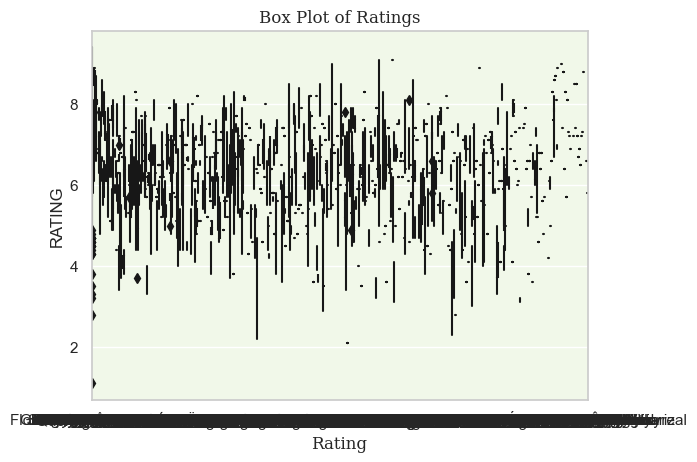

In [136]:
# extracting the director into a new column
movies['DIRECTOR'] = movies['STARS'].str.extract(r'Director:(.*?)\|')
movies['DIRECTOR'].fillna("Not specified", inplace=True)
# grouping movies by director
dir_group = movies.groupby('DIRECTOR').head(1000)
# Fill remaining NaN ratings with 0
movies['RATING'].fillna(0, inplace=True)


# Box plot
# Set Seaborn style
sns.set_theme(style="whitegrid", palette="muted", font_scale=1, rc={"grid.color": "#fff", "axes.facecolor": "#f1f8e9"})

# Create a box plot for the 'RATING' column
sns.boxplot(data=dir_group, x='DIRECTOR', y='RATING', color="#004d40")
plt.xlabel('Rating', fontfamily="serif")
plt.title('Box Plot of Ratings', fontfamily="serif")
plt.show()

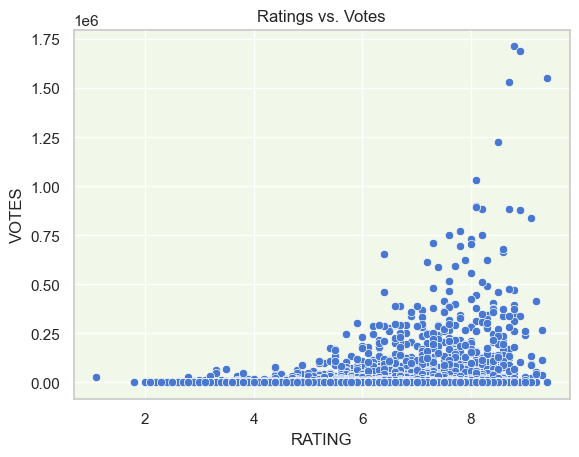

In [137]:
# Scatter Plot of Ratings vs. Votes
# Make a copy of the movies dataset
movies_copy = movies.copy()
# Drop rows with NaN values in 'RATING' or 'VOTES'
movies_copy.dropna(subset=['RATING', 'VOTES'], inplace=True)
movies_copy['VOTES'] = movies_copy['VOTES'].str.replace(r',', "", regex=True)
movies_copy['VOTES'] = movies_copy['VOTES'].astype(float)
sns.scatterplot(x='RATING', y='VOTES', data=movies_copy)
plt.title('Ratings vs. Votes')
plt.show()


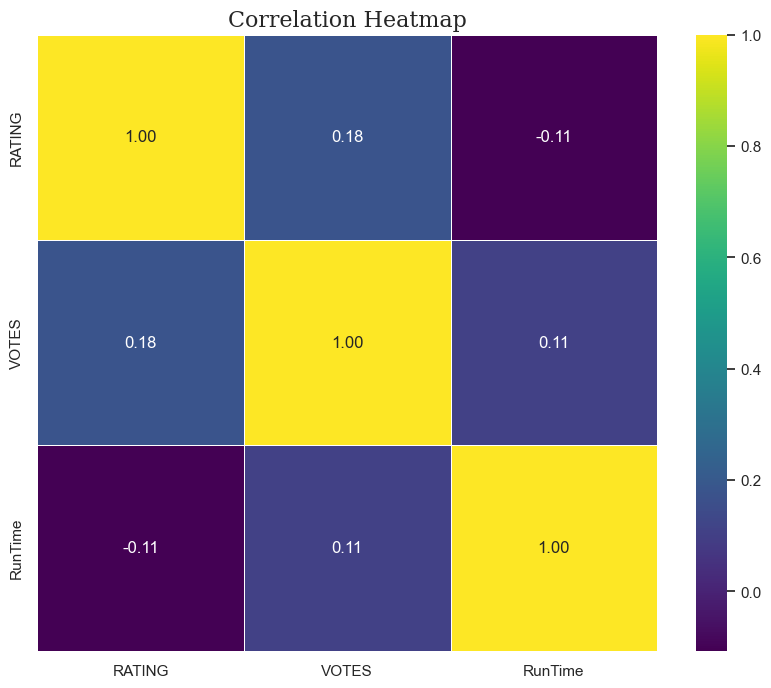

In [138]:
# Select numerical columns for covariance and correlation
numerical_columns = ['RATING', 'VOTES', 'RunTime']
# Create a correlation matrix
correlation_matrix = movies_copy[numerical_columns].corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16, fontfamily='serif')
plt.show()

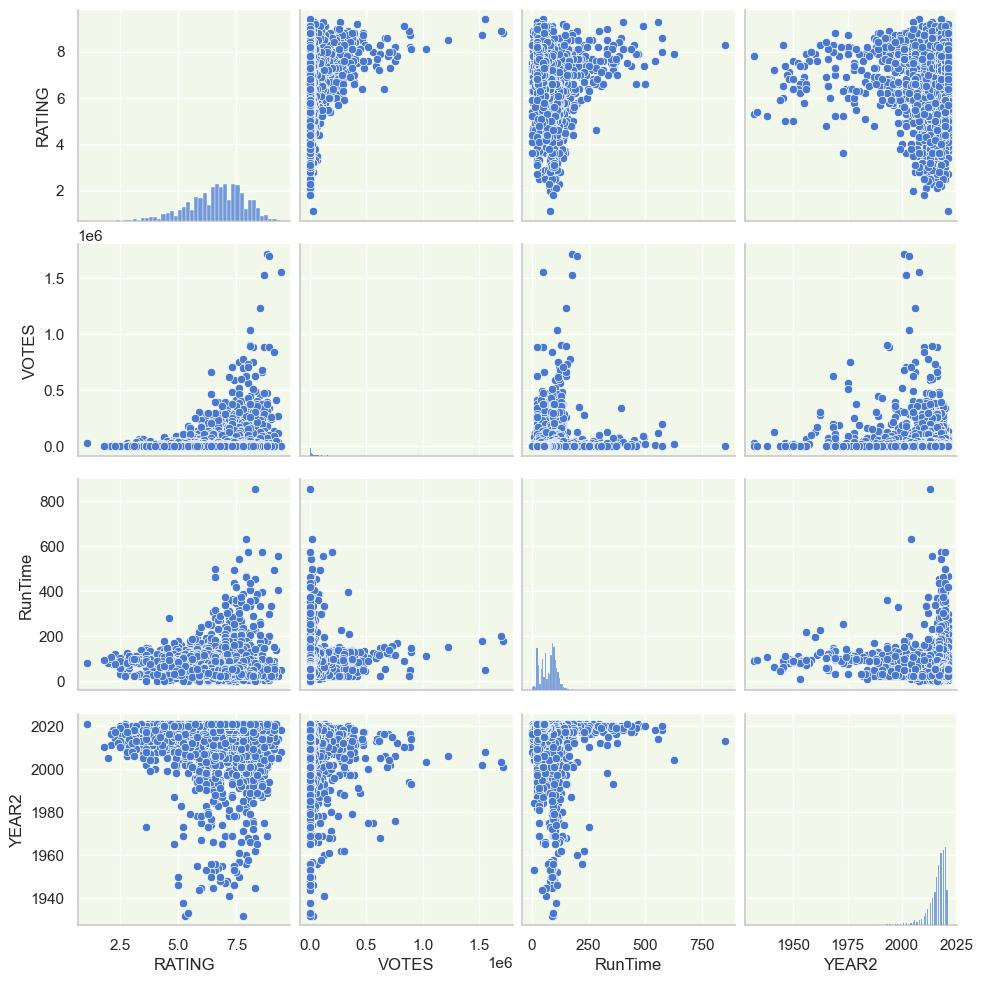

In [139]:
# Pair plot to visualize relationships between numerical columns
sns.pairplot(movies_copy)
plt.show()